In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def funcion(x):
    return (3*x**5)+(5*x**4)-x**3

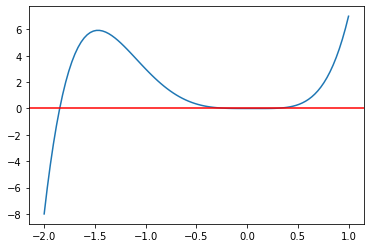

In [4]:
x = np.linspace(-2,1,100)
y = funcion(x)
plt.plot(x,y)
plt.axhline(y=0, color='r')

In [5]:
def Derivada(f,x,h=1e-6):
    return (f(x+h)-f(x-h))/(2*h)

In [6]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-8):
    
    error = 1.
    it = 0
    
    while error > precision and it < itmax:
        
        try:
            
            xn1 = xn - f(xn)/df(f,xn)
            # Criterio de parada
            error = np.abs(f(xn)/df(f,xn))
            
        except ZeroDivisionError:
            print('Division por cero')
            
        xn = xn1
        it += 1
    
    if it == itmax:
        return False
    else:
        return xn

In [7]:
def GetAllRoots(x, tolerancia=6):
    
    Roots = np.array([])
    
    for i in x:
        
        root = GetNewtonMethod(funcion,Derivada,i)
        
        if root != False:
            
            croot = np.round(root, tolerancia)
            
            if croot not in Roots:
                Roots = np.append(Roots,croot)
                
    Roots.sort() #Organiza la lista de forma ascendente
    
    return Roots

In [8]:
t=np.linspace(-2,1,20)
Roots = GetAllRoots(t)
Roots

array([-1.847127, -0.      ,  0.18046 ])

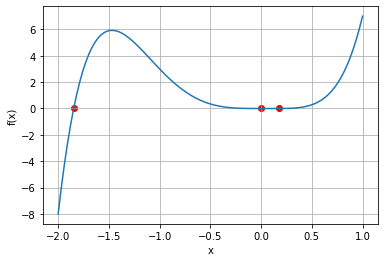

In [17]:
plt.scatter(Roots, funcion(Roots),color='r')
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

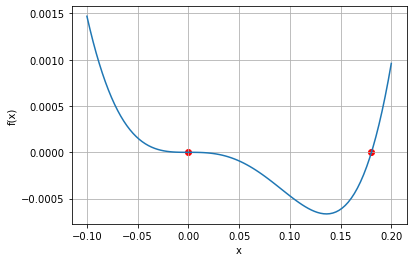

In [18]:
xx=np.linspace(-0.1,0.2,100)
yy=funcion(xx)
plt.scatter(Roots[1:], funcion(Roots[1:]),color='r')
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()